In [1]:
import pandas as pd

data = pd.read_csv("data.csv")

In [2]:
data.dtypes

Country                                                object
Year                                                    int64
Surface temperature anomaly                           float64
Surface temperature anomaly weighted by population    float64
Surface temperature anomaly weighted by area          float64
Rainfall                                              float64
Enrolment ratio                                       float64
dtype: object

Text(0.5, 1.0, 'Rainfall vs Enrolment ratio')

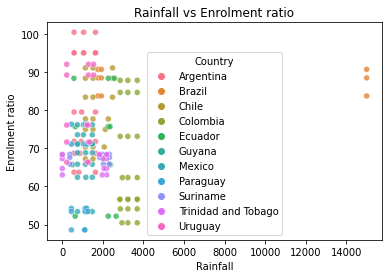

In [18]:
# Rainfall vs Enrolment ratio
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.scatterplot(data = data,x="Rainfall",y="Enrolment ratio",hue="Country",alpha=0.8).set_title("Rainfall vs Enrolment ratio")

Text(0.5, 1.0, 'Temperature vs Enrolment ratio')

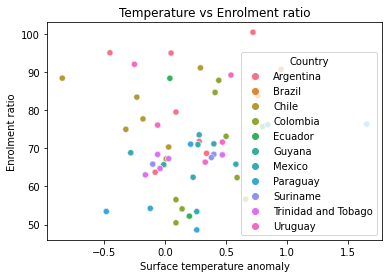

In [19]:
# Temperature vs Enrolment ratio
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.scatterplot(data = data,x="Surface temperature anomaly",y="Enrolment ratio",hue="Country",alpha=0.8).set_title("Temperature vs Enrolment ratio")

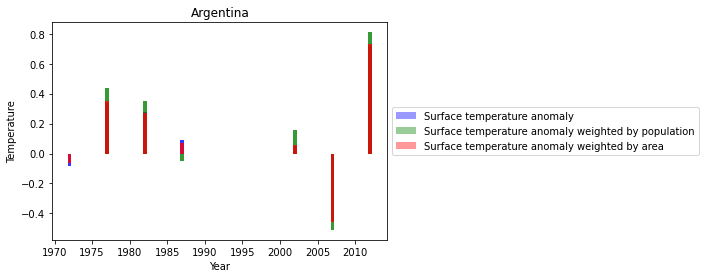

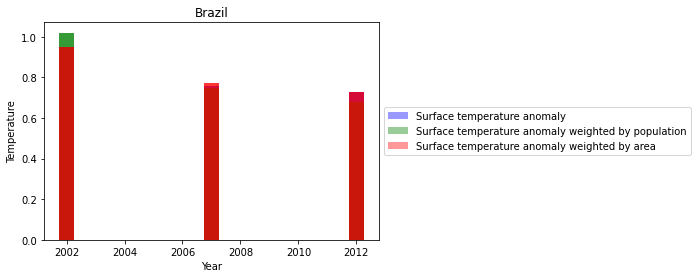

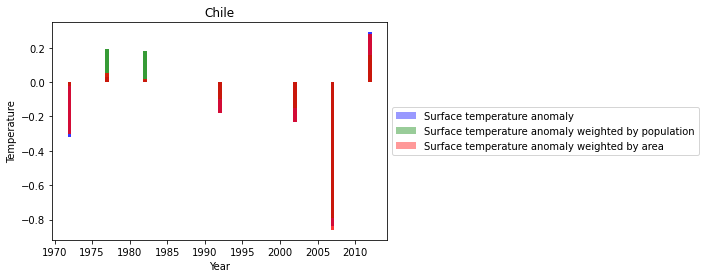

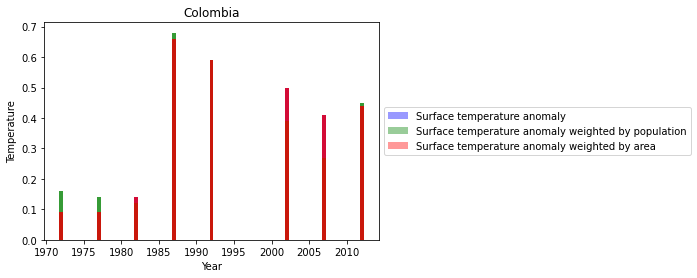

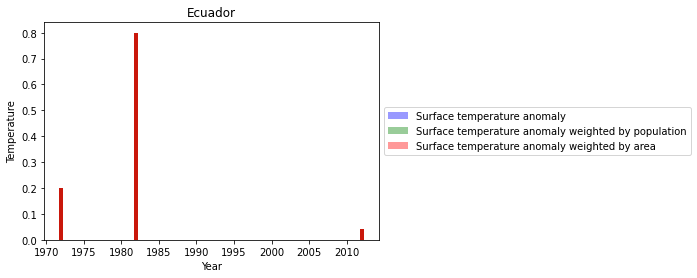

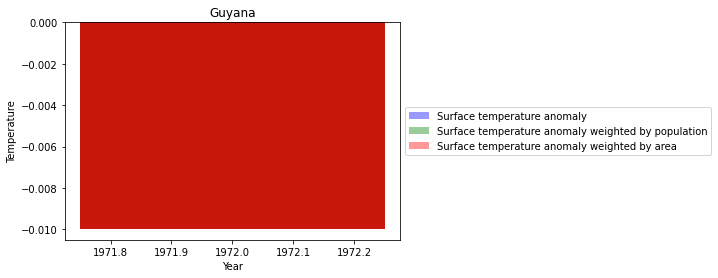

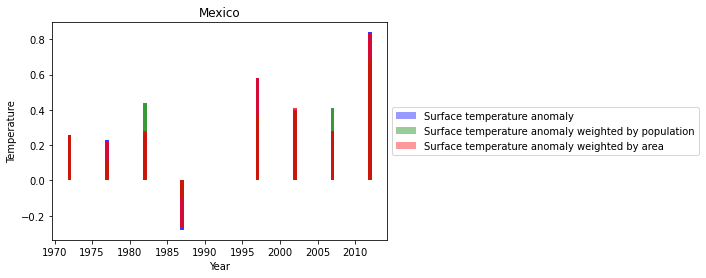

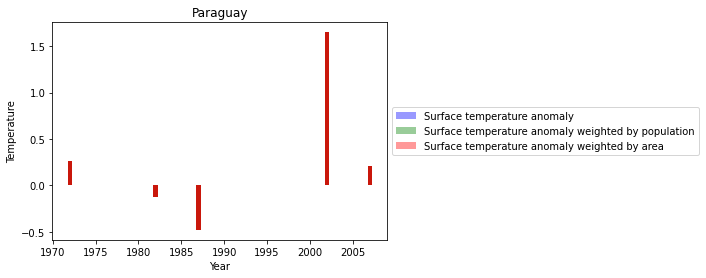

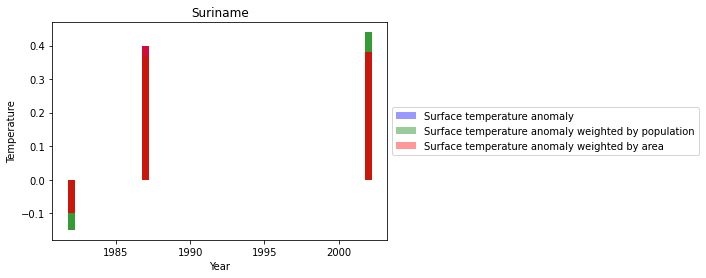

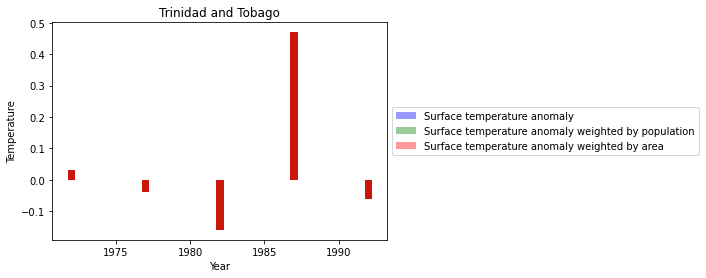

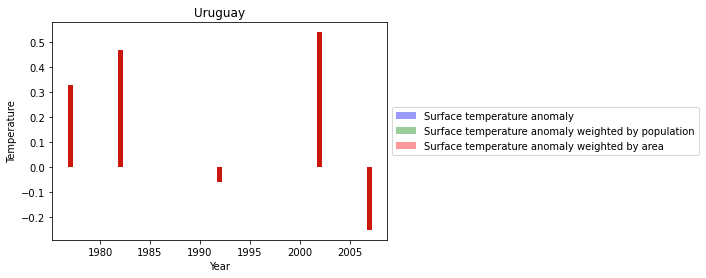

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

countries = data["Country"].unique()
  # print(countries.size)

for i,c in enumerate(countries):
  d = data.loc[data['Country'] == c]
  f, ax = plt.subplots()

  bar_width = 0.5
  opacity = 0.4

  year = d["Year"]
  Surface_temperature_anomaly = d["Surface temperature anomaly"]
  Surface_temperature_anomaly_weighted_by_population = d["Surface temperature anomaly weighted by population"]
  Surface_temperature_anomaly_weighted_by_area = d["Surface temperature anomaly weighted by area"]
  
  rects1 = ax.bar(year, Surface_temperature_anomaly, bar_width,
                  alpha=opacity, color='b',
                  label='Surface temperature anomaly')

  rects2 = ax.bar(year, Surface_temperature_anomaly_weighted_by_population, bar_width,
                  alpha=opacity, color='g',
                  label='Surface temperature anomaly weighted by population')
  
  rects3 = ax.bar(year, Surface_temperature_anomaly_weighted_by_area, bar_width,
                  alpha=opacity, color='r',
                  label='Surface temperature anomaly weighted by area')


  ax.set_xlabel('Year')
  ax.set_ylabel('Temperature')
  ax.set_title(c)
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  if i%col == col-1:
      r += 1

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

def lineplot_with_year(y):
  countries = data["Country"].unique()
  # print(countries.size)

  col = 2
  row = int(math.ceil(countries.size/col))

  plt.style.use('seaborn-pastel')
  fig, axes = plt.subplots(row,col, figsize=(20, 36))

  r = 0
  for i,c in enumerate(countries):
    d = data.loc[data['Country'] == c]
    sns.lineplot(ax=axes[r, i%col], data = d,x="Year",y=y).set_title(c)
    if i%col == col-1:
      r += 1

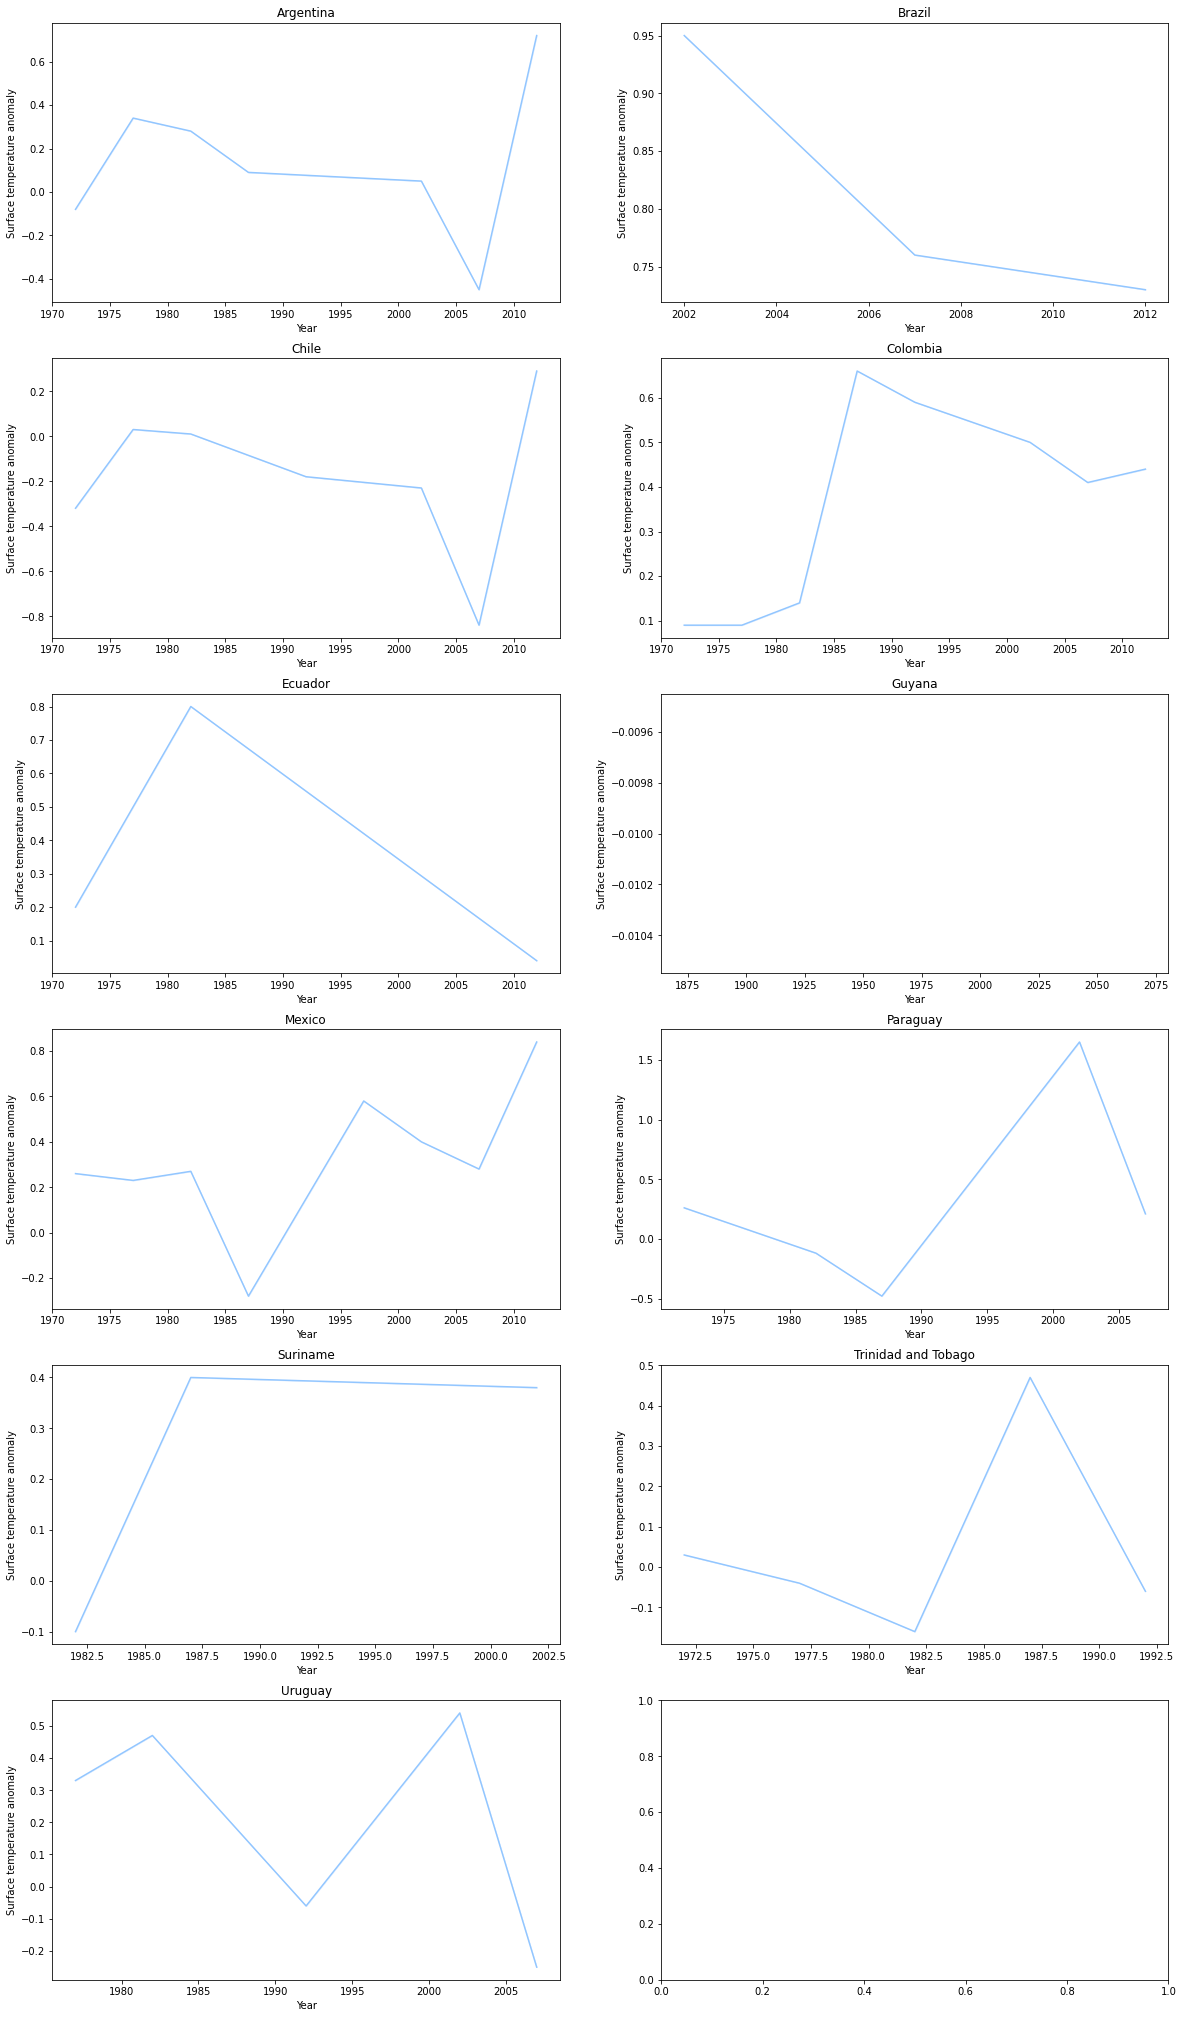

In [8]:
# year vs temperature
lineplot_with_year("Surface temperature anomaly")

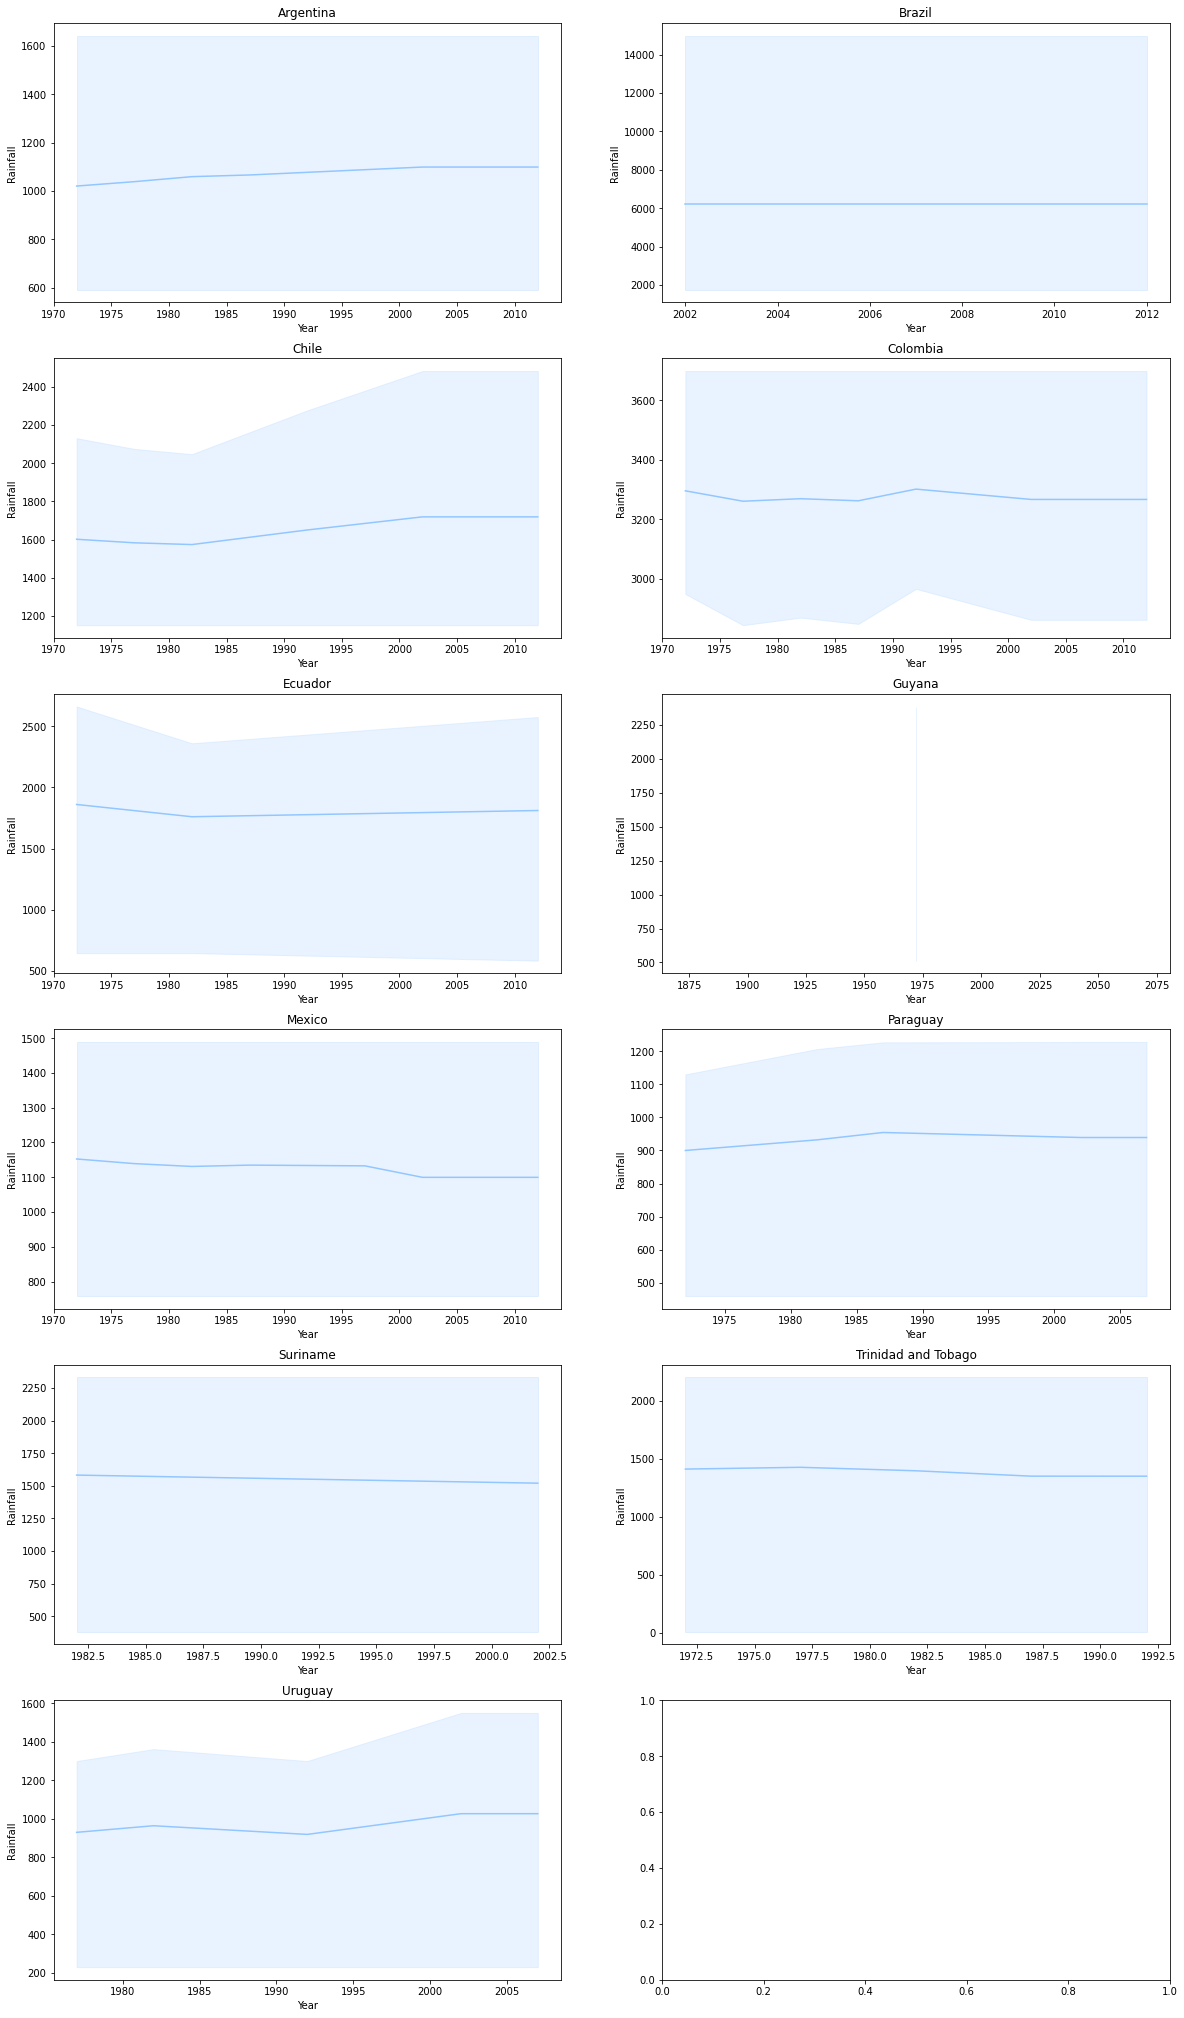

In [9]:
# year vs rainfall
lineplot_with_year("Rainfall")

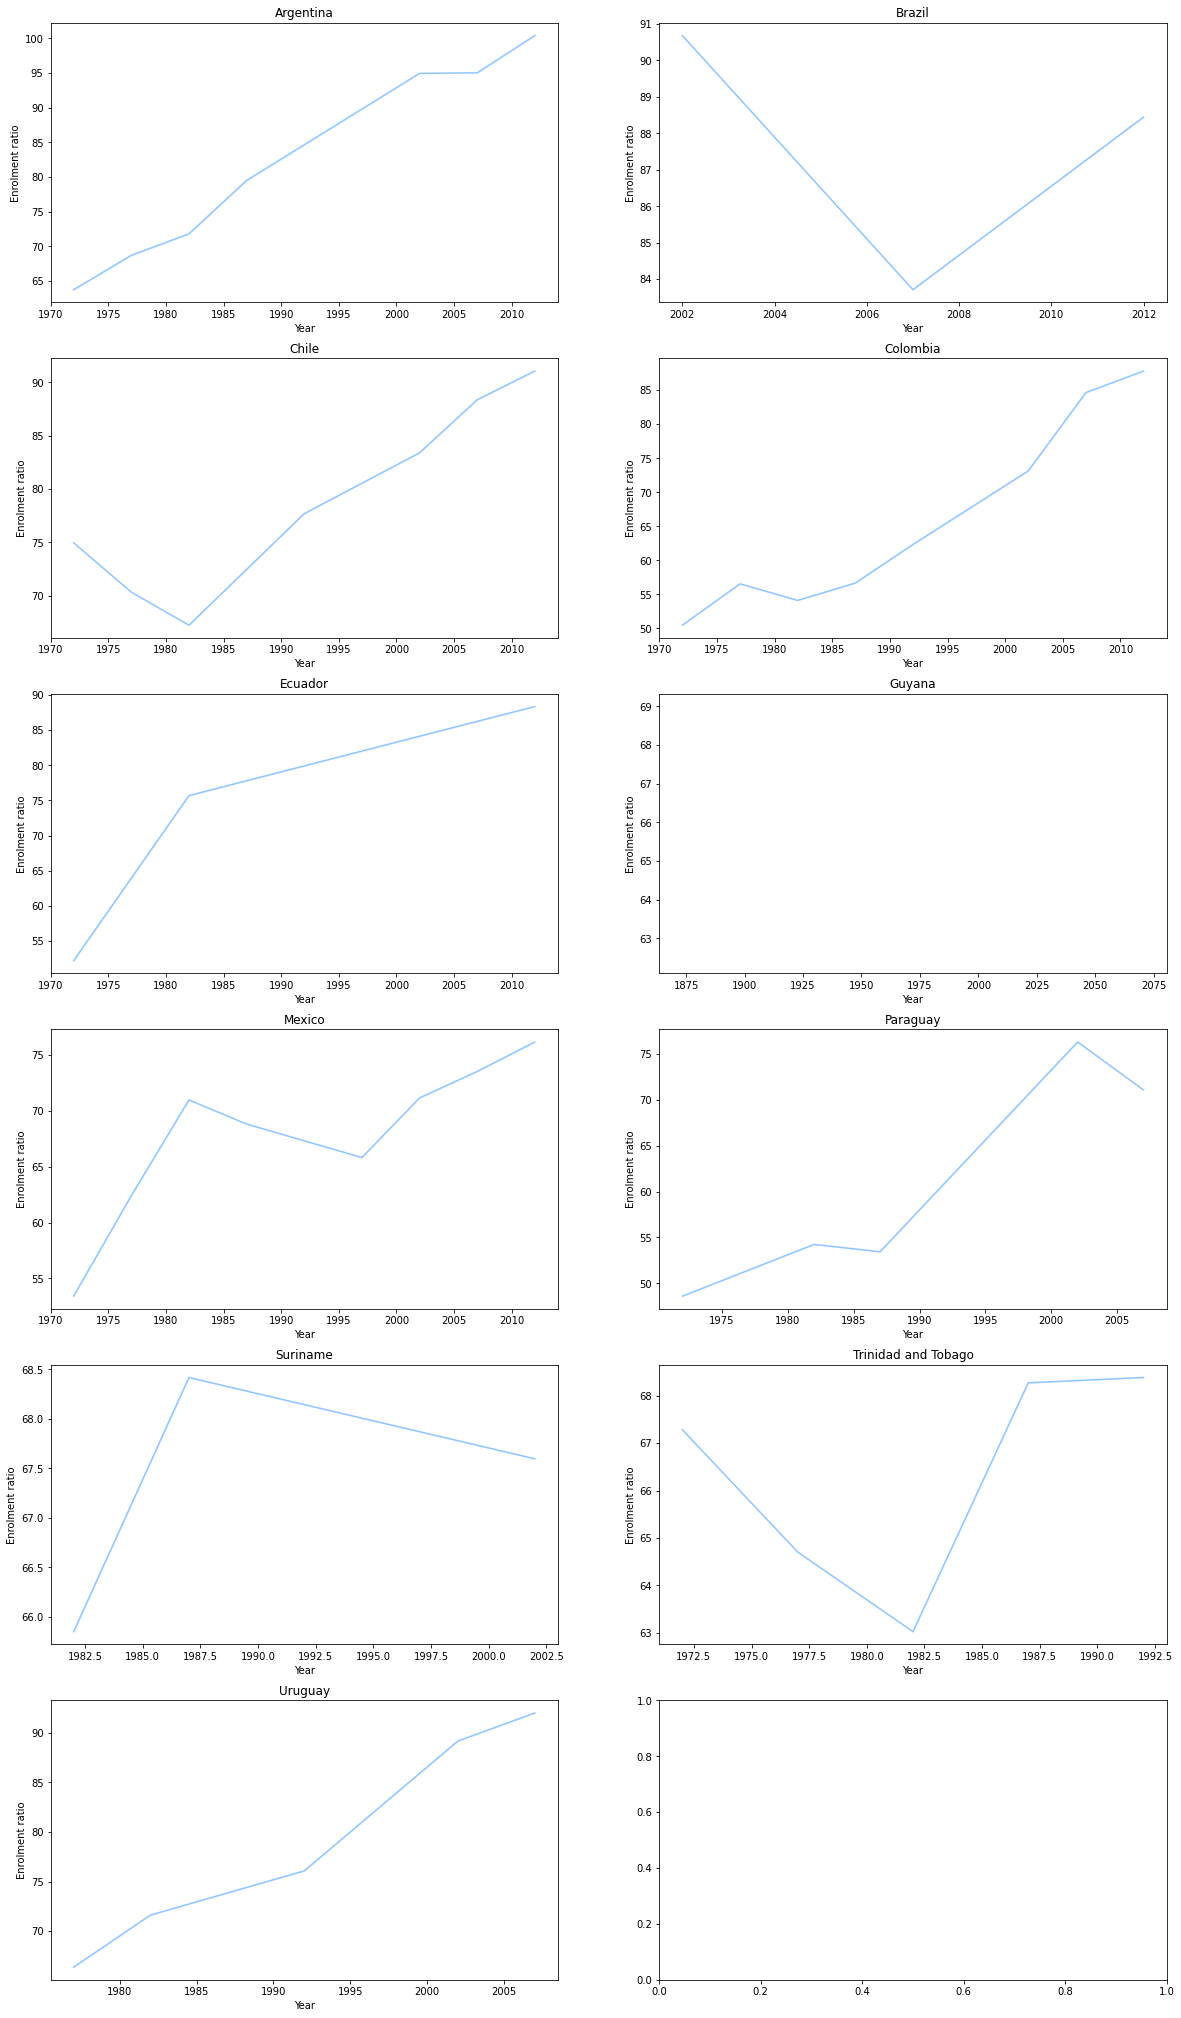

In [10]:
# year vs enrolment ratio
lineplot_with_year("Enrolment ratio")

In [40]:
# clean data one more time
# 1. use Surface temperature anomaly weighted by area as temperature 
import pandas as pd

data = pd.read_csv("data.csv")
data.dtypes

Country                                                object
Year                                                    int64
Surface temperature anomaly                           float64
Surface temperature anomaly weighted by population    float64
Surface temperature anomaly weighted by area          float64
Rainfall                                              float64
Enrolment ratio                                       float64
dtype: object

In [44]:
data = data.drop(columns="Surface temperature anomaly")
data = data.drop(columns="Surface temperature anomaly weighted by population")

In [47]:
params = ["Country","Year1","Year2","Temperature","Rainfall","Enrolment ratio"]
new_data = pd.DataFrame(columns=params)

countries = data["Country"].unique()
for i,c in enumerate(countries):
  d = data.loc[data['Country'] == c]
  m = 0
  year1 = 0
  year2 = 0
  for _, row in d.iterrows():
    if m == 0:
      temp = row["Surface temperature anomaly weighted by area"]
      rain = row["Rainfall"]
      edu = row["Enrolment ratio"]
      year1 = row["Year"]
      m += 1
    else:
      temp -= row["Surface temperature anomaly weighted by area"]
      rain -= row["Rainfall"]
      edu -= row["Enrolment ratio"]
      year2 = row["Year"]
      
      df = pd.DataFrame([[c,year1,year2,temp,rain,edu]],columns=params)
      new_data = new_data.append(df,ignore_index=True)
      m = 0
    

In [49]:
new_data.to_csv("data1.csv")